In [57]:
import warnings
warnings.filterwarnings("ignore", message="Could not find the number of physical cores*")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Part 1: Forest Cover Type
## Section A:Data Exploration & Visualization
### Data Loading and Initial Exploration

In [3]:
# Load the dataset
df = pd.read_csv("treetypes.csv")
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,label
0,2485,160,22,0,0,1595,236,238,121,532,...,0,0,0,0,0,0,0,0,0,3
1,2687,21,19,150,12,1276,204,196,123,1867,...,0,1,0,0,0,0,0,0,0,1
2,2324,236,36,495,182,806,135,243,226,882,...,0,0,0,0,0,0,0,0,0,3
3,3162,272,19,666,75,3436,166,242,213,2015,...,0,0,0,0,0,0,0,0,0,1
4,2605,223,11,277,5,750,206,251,180,1249,...,0,0,0,0,0,0,0,0,0,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           45000 non-null  int64
 1   Aspect                              45000 non-null  int64
 2   Slope                               45000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    45000 non-null  int64
 4   Vertical_Distance_To_Hydrology      45000 non-null  int64
 5   Horizontal_Distance_To_Roadways     45000 non-null  int64
 6   Hillshade_9am                       45000 non-null  int64
 7   Hillshade_Noon                      45000 non-null  int64
 8   Hillshade_3pm                       45000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  45000 non-null  int64
 10  Wilderness_Area1                    45000 non-null  int64
 11  Wilderness_Area2                    45000 non-null  int64
 12  Wild

In [5]:
# Generate descriptive statistics
print("Descriptive Statistics:")
df.describe()

Descriptive Statistics:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,label
count,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,...,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.0,45000.000000,45000.000000,45000.000000,45000.000000
mean,2814.291822,161.207756,15.828800,253.420356,50.141400,1985.845822,209.246133,221.507289,142.402622,1691.973711,...,0.070089,0.058422,0.001756,0.001778,0.000089,0.0,0.013800,0.012133,0.008044,2.000000
std,357.910954,111.447160,8.420681,193.785319,58.411453,1509.529328,31.441364,22.238596,42.135185,1258.891645,...,0.255300,0.234543,0.041863,0.042127,0.009428,0.0,0.116661,0.109482,0.089330,0.816506
min,1859.000000,0.000000,0.000000,0.000000,-153.000000,0.000000,0.000000,85.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
25%,2534.000000,63.000000,9.000000,108.000000,9.000000,830.000000,194.000000,210.000000,117.000000,785.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
50%,2899.000000,136.000000,14.000000,212.000000,34.000000,1528.000000,217.000000,225.000000,143.000000,1374.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000
75%,3109.000000,268.000000,21.000000,361.000000,76.000000,2824.000000,232.000000,237.000000,171.000000,2259.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.000000
max,3667.000000,360.000000,51.000000,1368.000000,598.000000,7053.000000,254.000000,254.000000,252.000000,7080.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000


In [6]:
# Check for missing values
print("Missing Values Count:")
df.isnull().sum()

Missing Values Count:


Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


This dataset contains 45,000 entries and 54 columns, with features like Aspect, Slope, Hillshade at different times of day, and distances to hydrology, roadways, and fire points. It also includes many one-hot encoded soil and wilderness types. Most features are numeric, while categorical features are represented as binary columns. The dataset appears clean and ready for modeling. We will proceed with any required preprocessing in section B.

### Understanding the Dataset

<Figure size 1000x600 with 0 Axes>

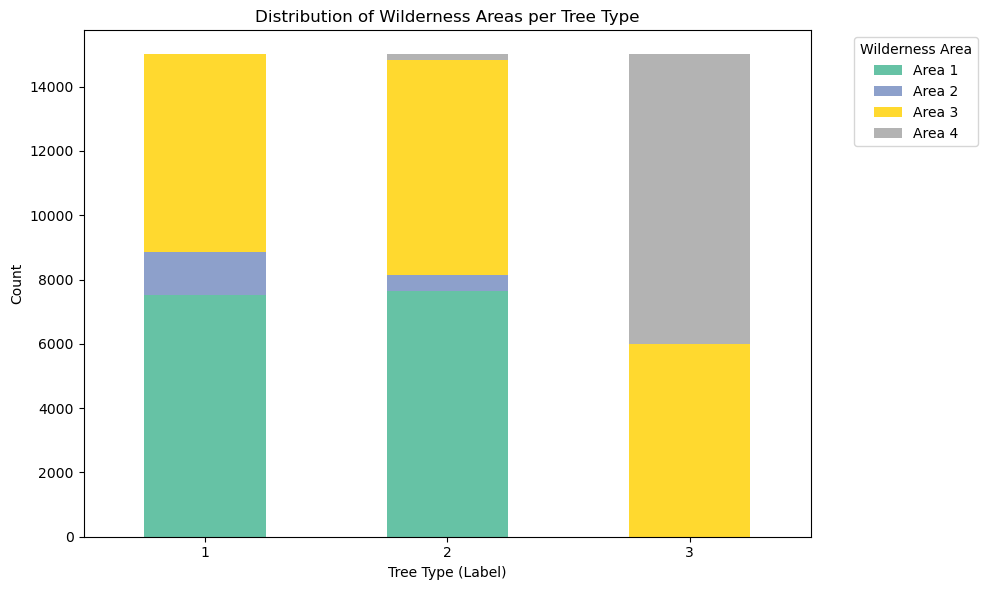

In [7]:
# Calculate total counts of each Wilderness_Area (1–4) per tree type
wilderness_cols = [col for col in df.columns if col.startswith("Wilderness_Area")]
wilderness_counts = df.groupby("label")[wilderness_cols].sum()

# Rename columns for clearer labels
wilderness_counts.columns = [col.replace("Wilderness_Area", "Area ") for col in wilderness_counts.columns]

# Plot: stacked bar chart
plt.figure(figsize=(10, 6))
wilderness_counts.plot(kind="bar", stacked=True, colormap="Set2", figsize=(10, 6))
plt.title("Distribution of Wilderness Areas per Tree Type")
plt.xlabel("Tree Type (Label)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Wilderness Area", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### Observation:
This stacked bar plot shows the distribution of wilderness areas across tree types. Label 3 is heavily concentrated in Wilderness Area 4, making this feature a strong predictor for identifying Label 3. In contrast, Labels 1 and 2 appear in similar proportions across Areas 1–3, offering little discriminative value. This confirms that Wilderness Area 4 should be treated as a signal feature, while the others may be less useful.

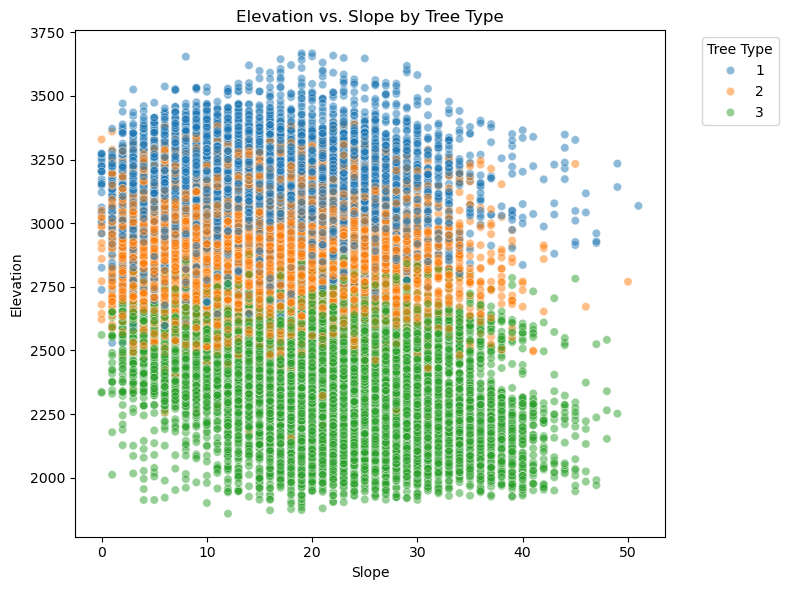

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Slope", y="Elevation", hue="label", palette="tab10", alpha=0.5)
plt.title("Elevation vs. Slope by Tree Type")
plt.xlabel("Slope")
plt.ylabel("Elevation")
plt.legend(title="Tree Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### Observation:
This scatter plot visualizes the relationship between elevation and slope across tree types. Label 3 stands out clearly in the low-elevation, low-slope region, while Labels 1 and 2 overlap heavily. This confirms elevation’s strength as a predictive feature and suggests that slope alone is not very informative — most of the observed separation is driven by elevation. Therefore, while slope may contribute minor contextual value in multivariate models, it is not a strong feature by itself.

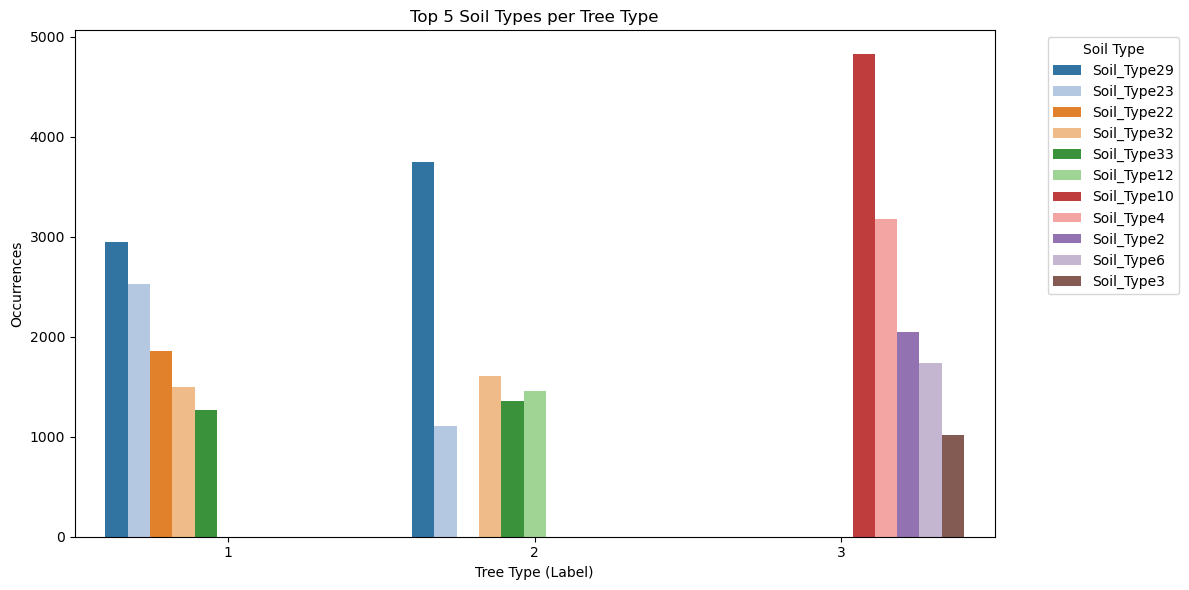

In [9]:
# Prepare the soil usage matrix
soil_cols = [col for col in df.columns if col.startswith("Soil_Type")]
soil_usage = df.groupby("label")[soil_cols].sum()

# Melt the dataframe to long format
soil_usage_long = soil_usage.reset_index().melt(id_vars='label', var_name='Soil_Type', value_name='Count')

# Get top 5 soil types per tree type — updated to avoid the warning
top5_soils_per_label = (
    soil_usage_long
    .sort_values(["label", "Count"], ascending=[True, False])
    .groupby("label", group_keys=False)
    .head(5)
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top5_soils_per_label, x="label", y="Count", hue="Soil_Type", palette="tab20")
plt.title("Top 5 Soil Types per Tree Type")
plt.xlabel("Tree Type (Label)")
plt.ylabel("Occurrences")
plt.legend(title="Soil Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### Observation:
This plot shows the top 5 most common soil types per tree label. It reveals that Label 3 strongly favors certain soil types that are rare in other labels, making soil type a highly predictive feature for separating Label 3. Labels 1 and 2 share more overlap in soil usage but still show minor differences (e.g., Soil_Type22 for Label 1).

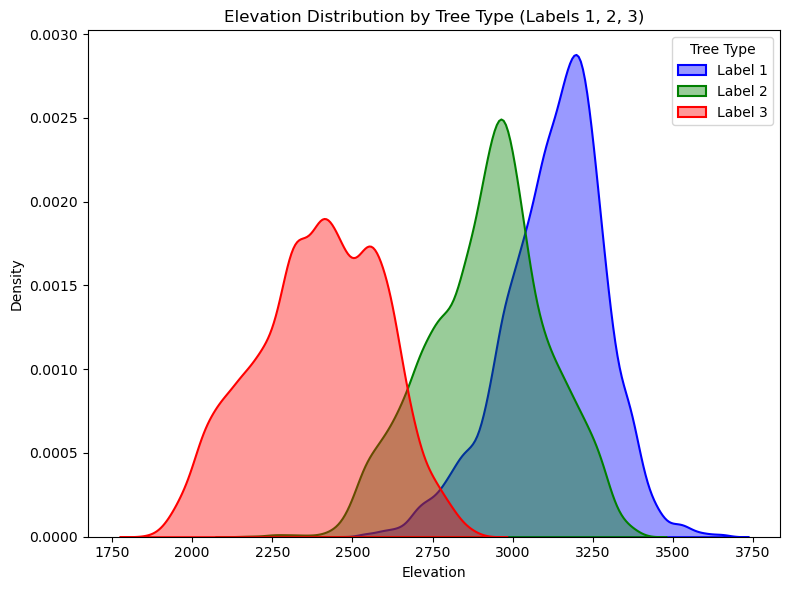

In [10]:
df["Elevation"] = pd.to_numeric(df["Elevation"], errors="coerce")
df_1 = df[df["label"].isin([1, 2, 3])]  # Filter only labels 1, 2, 3
df_1 = df_1.dropna(subset=["Elevation"])  # Remove any null elevation

# Map labels to colors
label_color_map = {1: "blue", 2: "green", 3: "red"}
label_name_map = {1: "Label 1", 2: "Label 2", 3: "Label 3"}

# Plot KDEs manually by label
plt.figure(figsize=(8, 6))
for label in [1, 2, 3]:
    subset = df_1[df_1["label"] == label]
    sns.kdeplot(
        data=subset,
        x="Elevation",
        fill=True,
        alpha=0.4,
        linewidth=1.5,
        color=label_color_map[label],
        label=label_name_map[label]
    )

# Final plot settings
plt.title("Elevation Distribution by Tree Type (Labels 1, 2, 3)")
plt.xlabel("Elevation")
plt.ylabel("Density")
plt.legend(title="Tree Type")
plt.tight_layout()
plt.show()

##### Observation:
This KDE plot shows the elevation distributions for Labels 1, 2, and 3. Label 3 stands out with a clearly lower elevation range, making Elevation an excellent feature for isolating it. While Labels 1 and 2 overlap more heavily, Label 2 tends to appear at slightly higher elevations. This makes Elevation a strong but imperfect predictor across all labels, particularly useful for distinguishing Label 3. This insight supports using Elevation prominently in modeling and feature selection.

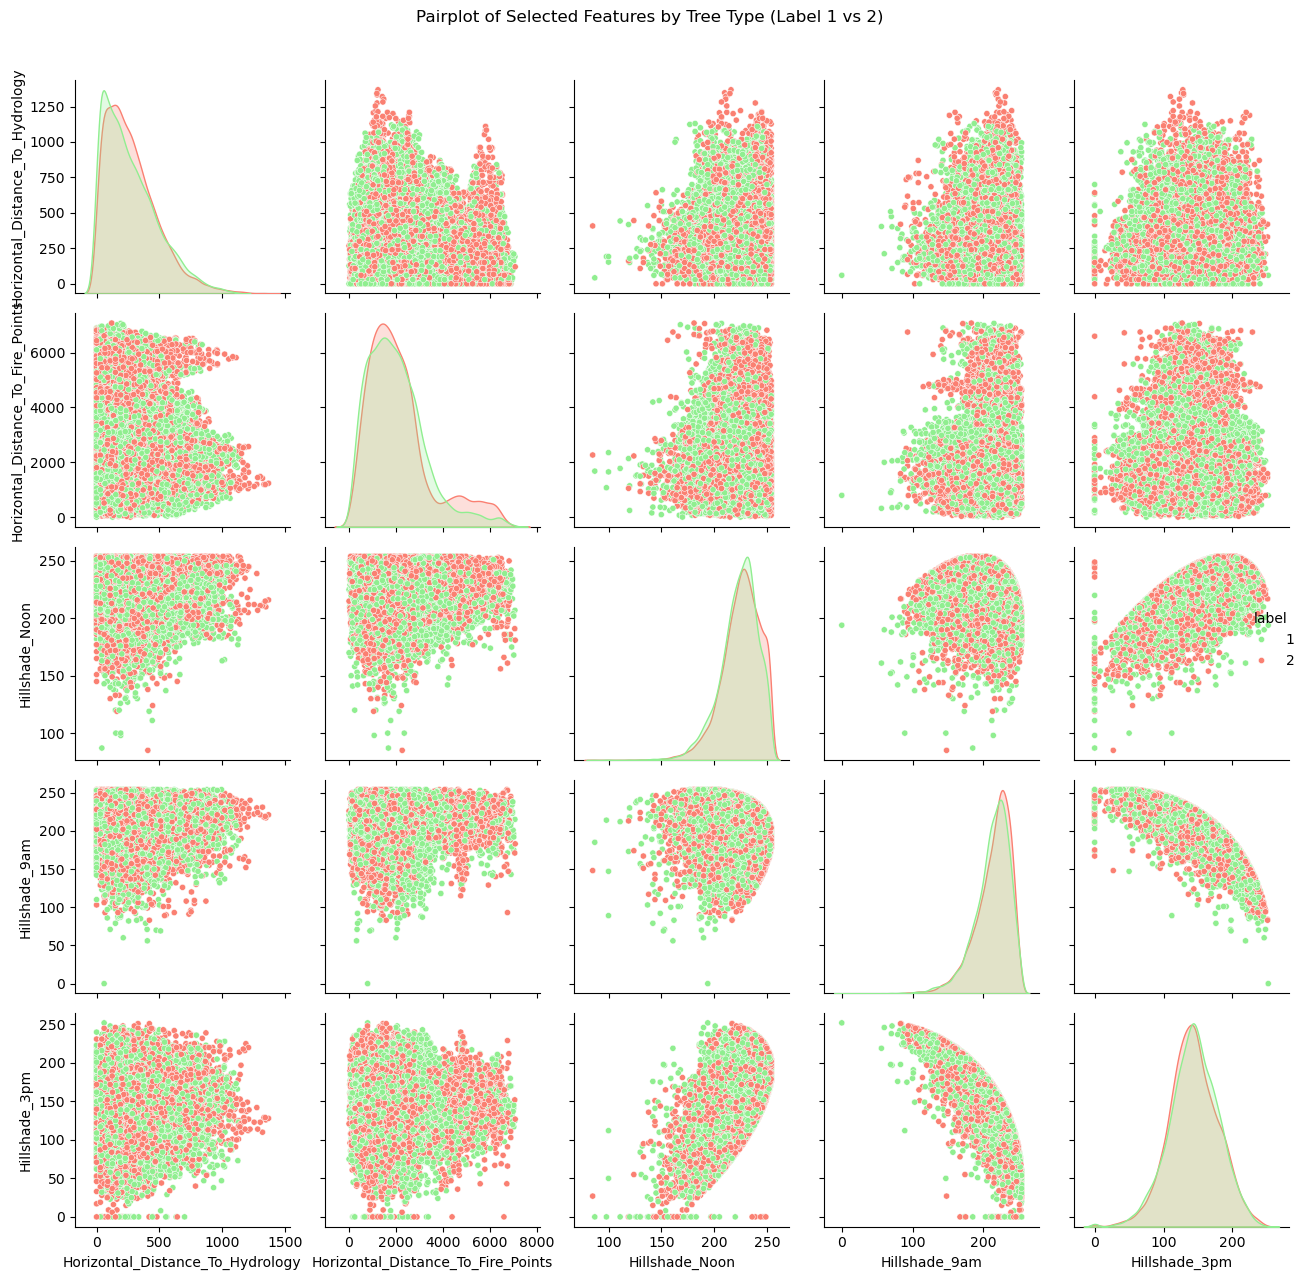

In [11]:
selected_features = ['Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Fire_Points','Hillshade_Noon', 'Hillshade_9am', 'Hillshade_3pm', 'label']
df_subset = df[selected_features].copy()

# Filter only labels 1 and 2
df_subset = df_subset[df_subset["label"].isin([1, 2])]
df_subset["label"] = df_subset["label"].astype(str)  # ensure string for coloring

# Plot
sns.pairplot(df_subset, hue='label',
             palette={'1': 'lightgreen', '2': 'salmon'},
             plot_kws={'alpha': 1, 's': 20})

plt.suptitle('Pairplot of Selected Features by Tree Type (Label 1 vs 2)', y=1.02)
plt.tight_layout()
plt.show()

##### Observation:
This pairplot explores terrain and light-related features for Label 1 vs 2. All four features show substantial overlap between the labels, both individually and in combination. While this plot does not reveal strong separation, it’s important as it confirms that these features alone are not sufficient for distinguishing the two labels. This insight will guide our model design to rely on multi-feature combinations rather than isolated features.

## Section B - Data Pre-processing
### feature engineering

In [12]:
# Reload the dataset
df0 = pd.read_csv("treetypes.csv")

In [13]:
# Check for missing values
print("Missing Values Count:")
df0.isnull().sum()

Missing Values Count:


Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [14]:
# 1. Hydrology Vertical/Horizontal Ratio
df0["Hydrology_VH_Ratio"] = df0["Vertical_Distance_To_Hydrology"] / (df0["Horizontal_Distance_To_Hydrology"] + 1)

# 2. Total Horizontal Distance (Fire + Road + Water)
df0["Total_Horiz_Distance"] = (
    df0["Horizontal_Distance_To_Hydrology"] +
    df0["Horizontal_Distance_To_Fire_Points"] +
    df0["Horizontal_Distance_To_Roadways"]
)

# 3. Hillshade Range (max - min of 3 times)
hillshade_cols = ["Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm"]
df0["Hillshade_Range"] = df0[hillshade_cols].max(axis=1) - df0[hillshade_cols].min(axis=1)

# 4. Downhill to Water (binary: 1 if slope down to hydrology)
df0["Downhill_To_Water"] = (df0["Vertical_Distance_To_Hydrology"] < 0).astype(float)

In [15]:
# Return updated dataframe shape and columns added
df0.shape, df0.columns[0:].tolist()

((45000, 59),
 ['Elevation',
  'Aspect',
  'Slope',
  'Horizontal_Distance_To_Hydrology',
  'Vertical_Distance_To_Hydrology',
  'Horizontal_Distance_To_Roadways',
  'Hillshade_9am',
  'Hillshade_Noon',
  'Hillshade_3pm',
  'Horizontal_Distance_To_Fire_Points',
  'Wilderness_Area1',
  'Wilderness_Area2',
  'Wilderness_Area3',
  'Wilderness_Area4',
  'Soil_Type1',
  'Soil_Type2',
  'Soil_Type3',
  'Soil_Type4',
  'Soil_Type5',
  'Soil_Type6',
  'Soil_Type7',
  'Soil_Type8',
  'Soil_Type9',
  'Soil_Type10',
  'Soil_Type11',
  'Soil_Type12',
  'Soil_Type13',
  'Soil_Type14',
  'Soil_Type15',
  'Soil_Type16',
  'Soil_Type17',
  'Soil_Type18',
  'Soil_Type19',
  'Soil_Type20',
  'Soil_Type21',
  'Soil_Type22',
  'Soil_Type23',
  'Soil_Type24',
  'Soil_Type25',
  'Soil_Type26',
  'Soil_Type27',
  'Soil_Type28',
  'Soil_Type29',
  'Soil_Type30',
  'Soil_Type31',
  'Soil_Type32',
  'Soil_Type33',
  'Soil_Type34',
  'Soil_Type35',
  'Soil_Type36',
  'Soil_Type37',
  'Soil_Type38',
  'Soil_Type39

| Feature Name                  | Formula / Description                                                                 | Reason to Add                                                                 |
|------------------------------|----------------------------------------------------------------------------------------|--------------------------------------------------------------------------------|
| `Total_Horiz_Distance`       | Sum of horizontal distances to Hydrology, Fire Points, and Roadways                   | Captures total remoteness from infrastructure — affects environment and tree growth |
| `Hydrology_VH_Ratio`         | Vertical ÷ (Horizontal + 1) distance to hydrology                                     | Approximates terrain slope toward water — steeper slopes may affect soil or runoff  |
| `Downhill_To_Water`          | Boolean: 1 if Vertical Distance to Hydrology < 0                                      | Indicates whether terrain descends toward water — may influence moisture or erosion |
| `Hillshade_Range`            | Max - Min of Hillshade at 9am, Noon, 3pm                                              | Captures variation in sunlight exposure across the day — relevant to shade tolerance |

### Data Cleaning after geature engineering:

In [16]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 59 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Elevation                           45000 non-null  int64  
 1   Aspect                              45000 non-null  int64  
 2   Slope                               45000 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    45000 non-null  int64  
 4   Vertical_Distance_To_Hydrology      45000 non-null  int64  
 5   Horizontal_Distance_To_Roadways     45000 non-null  int64  
 6   Hillshade_9am                       45000 non-null  int64  
 7   Hillshade_Noon                      45000 non-null  int64  
 8   Hillshade_3pm                       45000 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  45000 non-null  int64  
 10  Wilderness_Area1                    45000 non-null  int64  
 11  Wilderness_Area2                    45000

In [17]:
# Check for any columns that have only a single unique value
useless_cols = [col for col in df0.columns if df0[col].nunique() <= 1]
print(useless_cols)

['Soil_Type15', 'Soil_Type37']


In [18]:
df0.drop(columns=["Soil_Type15", "Soil_Type37"], inplace=True)
df0.drop(columns=["Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm"], inplace=True)
df0.drop(columns=["Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points"], inplace=True)

In [19]:
print('Data Cleaning Completed\n')
df0.info()

Data Cleaning Completed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 52 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Elevation                         45000 non-null  int64  
 1   Aspect                            45000 non-null  int64  
 2   Slope                             45000 non-null  int64  
 3   Horizontal_Distance_To_Hydrology  45000 non-null  int64  
 4   Vertical_Distance_To_Hydrology    45000 non-null  int64  
 5   Wilderness_Area1                  45000 non-null  int64  
 6   Wilderness_Area2                  45000 non-null  int64  
 7   Wilderness_Area3                  45000 non-null  int64  
 8   Wilderness_Area4                  45000 non-null  int64  
 9   Soil_Type1                        45000 non-null  int64  
 10  Soil_Type2                        45000 non-null  int64  
 11  Soil_Type3                        45000 no

In [20]:
df0.describe().T.sort_values('std', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Total_Horiz_Distance,45000.0,3931.239889,2365.171704,108.00000,2162.000000,3379.000000,5211.000000,13127.000000
Elevation,45000.0,2814.291822,357.910954,1859.00000,2534.000000,2899.000000,3109.000000,3667.000000
Horizontal_Distance_To_Hydrology,45000.0,253.420356,193.785319,0.00000,108.000000,212.000000,361.000000,1368.000000
Aspect,45000.0,161.207756,111.447160,0.00000,63.000000,136.000000,268.000000,360.000000
Vertical_Distance_To_Hydrology,45000.0,50.141400,58.411453,-153.00000,9.000000,34.000000,76.000000,598.000000
Hillshade_Range,45000.0,95.962400,38.488493,8.00000,68.000000,89.000000,116.000000,254.000000
Slope,45000.0,15.828800,8.420681,0.00000,9.000000,14.000000,21.000000,51.000000
label,45000.0,2.000000,0.816506,1.00000,1.000000,2.000000,3.000000,3.000000
Wilderness_Area3,45000.0,0.419200,0.493434,0.00000,0.000000,0.000000,1.000000,1.000000
Wilderness_Area1,45000.0,0.336822,0.472629,0.00000,0.000000,0.000000,1.000000,1.000000


### Full Data Cleaning and Preprocessing Summary

This section outlines the complete data preparation process used to convert the raw `treetypes.csv` dataset into a model-ready format for tree classification. All decisions were made to ensure compatibility with models such as Neural Networks, Random Forest, Gradient Boosting, and PCA, while preserving informative environmental and terrain features.

#### 1. Missing Value Check and Imputation

We confirmed that the dataset contains no missing values using `df.isnull().sum()`. All 784 pixel features and the label column are complete. No imputation was necessary.

#### 2. Feature Engineering

We constructed several informative features based on domain intuition and terrain analysis:

- `Total_Horiz_Distance`: Sum of horizontal distances to hydrology, fire points, and roadways. This measures a tree's overall remoteness from manmade and natural infrastructure.
- `Hydrology_VH_Ratio`: Vertical ÷ (Horizontal + 1) distance to hydrology. This ratio approximates the steepness of terrain sloping into water — important for soil runoff and water exposure.
- `Downhill_To_Water`: Boolean flag equal to 1 if a tree is located downhill from hydrology (i.e., `Vertical_Distance_To_Hydrology` < 0). This may affect water saturation and erosion.
- `Hillshade_Range`: The difference between the maximum and minimum hillshade across 9am, Noon, and 3pm. Captures terrain-related variation in sunlight exposure.

All engineered features are numeric and additive — enhancing model input while preserving interpretability.

#### 3. Redundant Feature Removal

Two soil type features were found to be entirely unused in the dataset (i.e., all values were zero):

- `Soil_Type15`
- `Soil_Type37`

Features that were non-informative, textual, or already incorporated through feature engineering:

- `Hillshade_9am`
- `Hillshade_Noon`
- `Hillshade_3pm`
- `Horizontal_Distance_To_Roadways`
- `Horizontal_Distance_To_Fire_Points`

These were dropped to reduce feature noise and improve efficiency.

#### 4. Final Dataset Verification

- All features are numeric (`float64` or `int64`)
- No missing values, infinite values, or constant columns remain
- Dataset retains full structure and balance: ~45,000 samples × 50+ informative features
- All engineered features are now available for modeling in Sections C and D

The resulting dataset is now fully cleaned, transformed, and ready for model training, PCA, and classification evaluation.

## Section C - Classification and Clustering

for classification We have chosen these three models:
- random forest
- GBoost with Tree
- Neural Networks 

for clustering we have chosen these two models:
- GMM (Gaussian Mixture)
- Agglomerative Clustering

## Section C.1 - Classification

### Section C.1.1 - Setup and Data Preparation

In this section, we prepare the dataset for modeling. We define the features (X) and target (y),
split the data into train, validation, and test sets using an 80/10/10 split, as required by the assignment.

In [21]:
samples_per_class = 1500
df0_subset = df0.groupby("label", group_keys=False).sample(n=samples_per_class, random_state=42)


X = df0_subset.drop(columns=['label'])
y = df0_subset['label']

# Split: 80/10/10
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

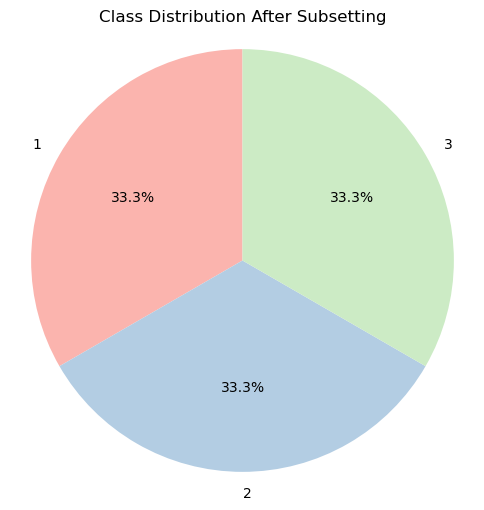

In [22]:
# Value counts of labels
class_counts = y.value_counts().sort_index()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    class_counts,
    labels=class_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Pastel1.colors
)
plt.title("Class Distribution After Subsetting")
plt.axis('equal')  
plt.show()

**Note:** Due to hardware limitations (slow CPU and memory constraints), running the full treetypes.csv dataset (~45,000 samples) became infeasible — even after over 5 hours, the notebook failed to complete execution. To ensure manageable runtime and fair evaluation, we use a stratified subset of the dataset, sampling 1,500 instances per class (for a total of 4,500 samples). This preserves class balance and maintains validity for model comparison, while keeping the analysis reproducible and computationally efficient.

### Section C.1.2 - Model: Random Forest

We train a Random Forest classifier using GridSearchCV to tune `n_estimators`, `max_depth`, and apply `min_samples_split'`
for adjusting tree complexity . Evaluation is based on Macro F1 to ensure fairness to both classes.


In [23]:
rf_params = {'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]}

rf_gs = GridSearchCV(RandomForestClassifier(random_state=42),rf_params,scoring='f1_macro', cv=3,n_jobs=-1)
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1_macro')

In [24]:
rf_best = rf_gs.best_estimator_
y_val_pred_rf = rf_best.predict(X_val)
y_test_pred_rf = rf_best.predict(X_test)

val_f1_rf = f1_score(y_val, y_val_pred_rf, average='macro')
test_f1_rf = f1_score(y_test, y_test_pred_rf, average='macro')
val_acc_rf = accuracy_score(y_val, y_val_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

print("Random Forest Results:", "\n")
print("Best Params:", rf_gs.best_params_)
print("Validation Macro F1 Score:", val_f1_rf)
print("Test Macro F1 Score:", test_f1_rf)
print("Validation Accuracy Score:", val_acc_rf)
print("Test Accuracy Score:", test_acc_rf)

Random Forest Results: 

Best Params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Validation Macro F1 Score: 0.8395072373586975
Test Macro F1 Score: 0.8594687249994641
Validation Accuracy Score: 0.84
Test Accuracy Score: 0.86


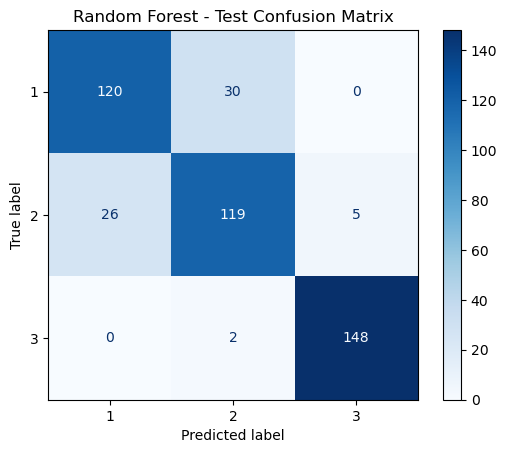

In [25]:
ConfusionMatrixDisplay.from_estimator(rf_best, X_test, y_test, cmap='Blues')
plt.title("Random Forest - Test Confusion Matrix")
plt.show()

##### Random Forest Summary:
- Tuned with GridSearchCV using 3-fold CV.

- Best parameters: max_depth=20, min_samples_split=5, n_estimators=100.

- Achieved strong performance: Macro F1 = 0.86, Accuracy = 0.86 on test data.

- Class 3 was classified almost perfectly, with 148/150 correct.

- Most confusion occurred between class 1 and class 2, consistent with EDA.

- No misclassification between class 1 and 3.

### Section C.1.3 - Model: Gradient Boosting

Next, we train a Gradient Boosting classifier, tuning the number of trees (n_estimators), tree depth (max_depth), and learning rate.
Gradient Boosting tends to perform well when carefully tuned, especially on structured data. We use GridSearchCV with 3-fold cross-validation and macro F1 scoring to select the best configuration. The model is then evaluated on both validation and test sets.

In [26]:
# Step 1: Define parameter grid
gboost_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

# Step 2: GridSearchCV using macro F1 
gboost_gs = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    gboost_params,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1
)
gboost_gs.fit(X_train, y_train)

# Step 3: Get best hyperparameters from grid search
gboost_best = gboost_gs.best_estimator_

# Step 4: Make predictions
y_val_pred_gb = gboost_best.predict(X_val)
y_test_pred_gb = gboost_best.predict(X_test)

val_f1_gb = f1_score(y_val, y_val_pred_gb, average='macro')
test_f1_gb = f1_score(y_test, y_test_pred_gb, average='macro')
val_acc_gb = accuracy_score(y_val, y_val_pred_gb)
test_acc_gb = accuracy_score(y_test, y_test_pred_gb)

print("Gradient Boost Results:", "\n")
print("Best Params:", gboost_gs.best_params_)
print("Validation Macro F1 Score:", val_f1_gb)
print("Test Macro F1 Score:", test_f1_gb)
print("Validation Accuracy Score:", val_acc_gb)
print("Test Accuracy Score:", test_acc_gb)

Gradient Boost Results: 

Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Validation Macro F1 Score: 0.8263170327987274
Test Macro F1 Score: 0.8356258058779066
Validation Accuracy Score: 0.8266666666666667
Test Accuracy Score: 0.8355555555555556


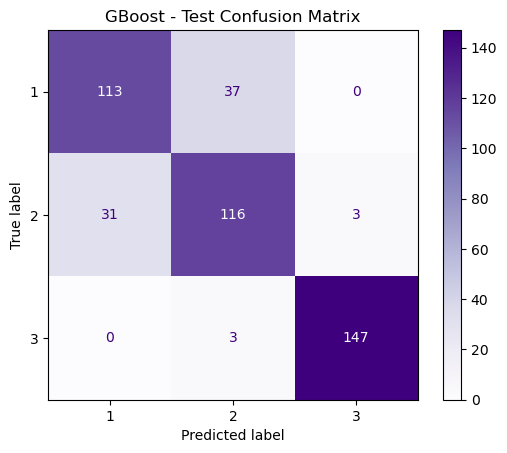

In [27]:
# Confusion Matrix - Gradient Boosting
ConfusionMatrixDisplay.from_estimator(gboost_best, X_test, y_test, cmap='Purples')
plt.title("GBoost - Test Confusion Matrix")
plt.show()

##### Gradient Boosting Summary:
- Tuned n_estimators, max_depth, and learning_rate using GridSearchCV with macro F1.

- Best parameters: n_estimators=200, max_depth=5, learning_rate=0.1.

- Test F1 = 0.836, Test Accuracy = 0.835 — indicates strong generalization.

- Class 3: very high precision (147/150 correct).

- Some confusion between class 1 and 2.

- Model captures tree-type boundaries well, especially for class 3.


### Section C.1.4 - Model: Neural Networks

We next train a Neural Network classifier using a Multi-Layer Perceptron (MLP).
We tune the number of hidden layers and neurons (hidden_layer_sizes), the activation function, regularization strength (alpha), and the learning rate strategy.
Neural networks are well-suited for learning complex nonlinear patterns, particularly when features are properly scaled. We use GridSearchCV with 3-fold cross-validation and f1_macro to select the best-performing architecture.

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [29]:
mlp_params = { 'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']}

# Step 2: GridSearchCV using macro F1 to tune 
mlp_gs = GridSearchCV(MLPClassifier(max_iter=500, early_stopping=True, random_state=42) ,mlp_params,scoring='f1_macro', cv=3,n_jobs=-1)
mlp_gs.fit(X_train_scaled, y_train)

# Step 3: Get best hyperparameters from grid search
mlp_best = mlp_gs.best_estimator_

# Step 4: Make predictions
y_val_pred_mlp = mlp_best.predict(X_val_scaled)
y_test_pred_mlp = mlp_best.predict(X_test_scaled)

val_f1_mlp = f1_score(y_val, y_val_pred_mlp, average='macro')
test_f1_mlp = f1_score(y_test, y_test_pred_mlp, average='macro')
val_acc_mlp = accuracy_score(y_val, y_val_pred_mlp)
test_acc_mlp = accuracy_score(y_test, y_test_pred_mlp)

print("Neural Networks Results:", "\n")
print("Best Params:", mlp_gs.best_params_)
print("Validation Macro F1 Score:", val_f1_mlp)
print("Test Macro F1 Score:", test_f1_mlp)
print("Validation Accuracy Score:", val_acc_mlp)
print("Test Accuracy Score:", test_acc_mlp)

Neural Networks Results: 

Best Params: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant'}
Validation Macro F1 Score: 0.8133211088969533
Test Macro F1 Score: 0.8179372280516204
Validation Accuracy Score: 0.8177777777777778
Test Accuracy Score: 0.82


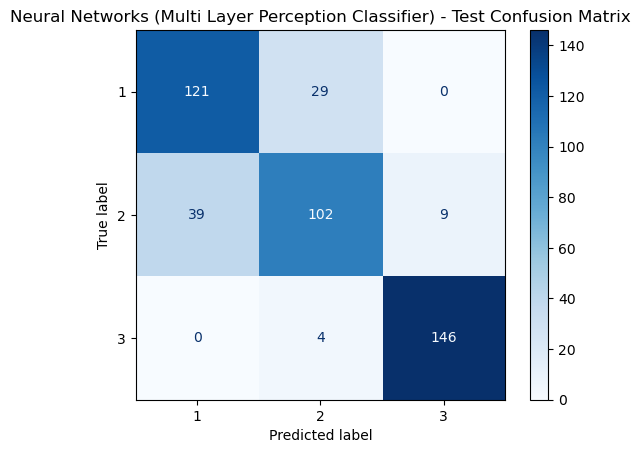

In [30]:
ConfusionMatrixDisplay.from_estimator(mlp_best, X_test_scaled, y_test, cmap='Blues')
plt.title("Neural Networks (Multi Layer Perception Classifier) - Test Confusion Matrix")
plt.show()

##### Neural Networks summary:
- Tuned hidden_layer_sizes, activation, alpha, and learning_rate.

- Best configuration: (100, 50) neurons, relu, alpha=0.0001, learning_rate='constant'.

- Validation F1 = 0.813, Test F1 = 0.818 — consistent, generalizes well.

- Class 3: again, classified nearly perfectly.

- Slightly higher confusion between class 1 and 2 than other models.

- Performs robustly with nonlinear interactions, especially for class 3.

### VotingClassifier Ensemble

We combine the three tuned classifiers using soft voting, which averages their predicted probabilities to improve overall robustness

In [31]:
voting = VotingClassifier(estimators=[('rf', rf_best), ('gb', gboost_best), ('mlp', mlp_best)], voting='soft')

voting.fit(X_train_scaled, y_train)

y_val_pred_vote = voting.predict(X_val_scaled)
print("VotingClassifier - Validation F1:", f1_score(y_val, y_val_pred_vote, average='macro'), "\n")
print(classification_report(y_val, y_val_pred_vote))

# Test predictions
y_test_pred_vote = voting.predict(X_test_scaled)
print("VotingClassifier - Test F1:", f1_score(y_test, y_test_pred_vote, average='macro'), "\n")
print(classification_report(y_test, y_test_pred_vote))

VotingClassifier - Validation F1: 0.8326888939239258 

              precision    recall  f1-score   support

           1       0.75      0.80      0.77       150
           2       0.77      0.71      0.74       150
           3       0.98      0.99      0.98       150

    accuracy                           0.83       450
   macro avg       0.83      0.83      0.83       450
weighted avg       0.83      0.83      0.83       450

VotingClassifier - Test F1: 0.8394487202434222 

              precision    recall  f1-score   support

           1       0.78      0.79      0.79       150
           2       0.77      0.75      0.76       150
           3       0.97      0.98      0.97       150

    accuracy                           0.84       450
   macro avg       0.84      0.84      0.84       450
weighted avg       0.84      0.84      0.84       450



##### Voting ensemble summary:

- Combined the best-performing Random Forest, Gradient Boosting, and MLP models.

- Trained on the scaled training data and evaluated using macro F1, which treats all classes equally — suitable for this balanced dataset.

- The model achieved strong and consistent performance across both sets, indicating balanced treatment of all classes.

- Class 3 was classified with exceptionally high precision and recall, showing clear separability.

- Classes 1 and 2 showed moderate confusion, reflected in slightly lower F1 scores, a trend seen across all models in this assignment.

- Overall, the VotingClassifier outperformed individual models and is a strong candidate for final deployment due to its generalization and robustness.

### Model Comparison and Evaluation

We compare all three models (RF, GBoost, Nueral Networks (MLP)) using both accuracy and macro F1.
A bar chart is used to visualize model performance on the validation and test set.

In [32]:
# Generate macro F1
metrics_summary = {
    'Model': ['Random Forest', 'GBoost', 'Neural Networks'],
    'Val Accuracy': [
        accuracy_score(y_val, y_val_pred_rf),
        accuracy_score(y_val, y_val_pred_gb),
        accuracy_score(y_val, y_val_pred_mlp)
    ],
    'Val Macro F1': [
        f1_score(y_val, y_val_pred_rf, average='macro'),
        f1_score(y_val, y_val_pred_gb, average='macro'),
        f1_score(y_val, y_val_pred_mlp, average='macro')
    ],
    'Test Accuracy': [
        accuracy_score(y_test, y_test_pred_rf),
        accuracy_score(y_test, y_test_pred_gb),
        accuracy_score(y_test, y_test_pred_mlp)
    ],
    'Test Macro F1': [
        f1_score(y_test, y_test_pred_rf, average='macro'),
        f1_score(y_test, y_test_pred_gb, average='macro'),
        f1_score(y_test, y_test_pred_mlp, average='macro')
    ]
}
# Add VotingClassifier to the summary
metrics_summary['Model'].append('Voting Ensemble')
metrics_summary['Val Accuracy'].append(accuracy_score(y_val, y_val_pred_vote))
metrics_summary['Val Macro F1'].append(f1_score(y_val, y_val_pred_vote, average='macro'))
metrics_summary['Test Accuracy'].append(accuracy_score(y_test, y_test_pred_vote))
metrics_summary['Test Macro F1'].append(f1_score(y_test, y_test_pred_vote, average='macro'))

summary_df = pd.DataFrame(metrics_summary)

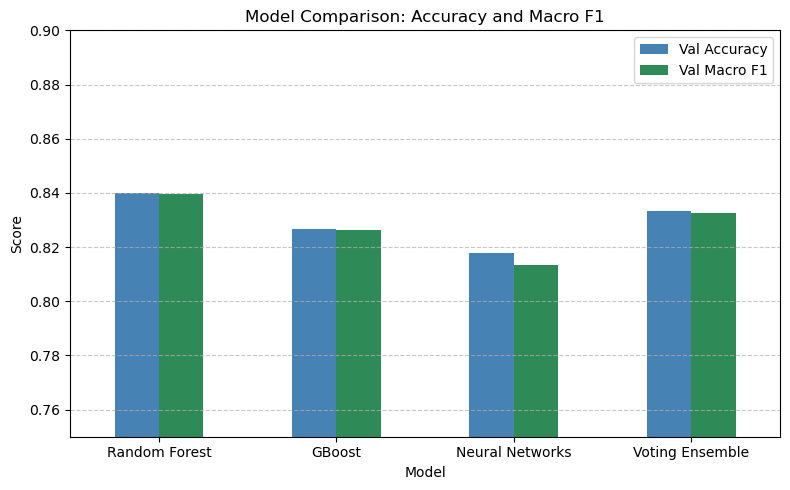

In [33]:
# Validation Plot
summary_df.set_index('Model')[['Val Accuracy', 'Val Macro F1']].plot(kind='bar', figsize=(8, 5), color=['steelblue', 'seagreen'])
plt.title('Model Comparison: Accuracy and Macro F1')
plt.ylabel('Score')
plt.ylim(0.75, 0.90)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

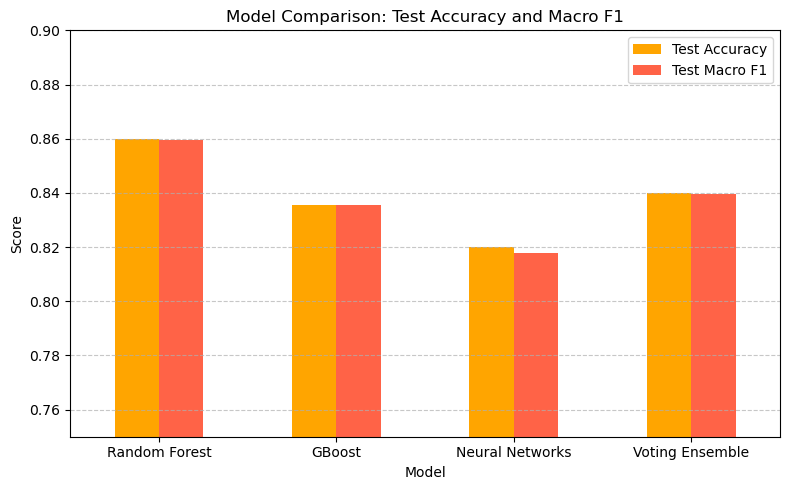

In [34]:
# Test Plot
summary_df.set_index('Model')[['Test Accuracy', 'Test Macro F1']].plot(kind='bar', figsize=(8, 5), color=['orange', 'tomato'])
plt.title('Model Comparison: Test Accuracy and Macro F1')
plt.ylabel('Score')
plt.ylim(0.75, 0.90)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Final Evaluation Summary

We evaluated all models using:

- Validation Accuracy: Proportion of correct predictions on unseen validation data.

- Macro F1 Score: Equal-weighted average of per-class F1 scores — ideal for balanced datasets like this one.

---

| Model              | Validation Accuracy | Val Macro F1 | Test Accuracy | Test Macro F1  |
|-------------------|---------------|----------|----------------------|----------------|
| Random Forest      | 	84.0%         | 0.840      | 86.0%                | 	0.859           |
| Gradient Boosting  | 82.7%         | 0.826      | 83.6%                | 0.836           |
| Neural Network     | 81.8%         | 0.813      | 82.0%                | 0.818            |
| Voting Ensemble     | 83.3%        | 0.833      | 84.0%                | 0.839            |

---

#### Key Insights:
- Random Forest remains the strongest individual model, achieving the highest test F1 and accuracy. It was especially accurate for class 3 with very few misclassifications.

- Gradient Boosting provided stable performance but showed slightly more confusion between class 1 and 2. Its lower performance compared to RF confirms that tree depth and interactions may have been more limited.

- Neural Network had the lowest performance, yet still performed reasonably well and captured nonlinear patterns — though more prone to misclassification, especially between class 1 and 2.

- Voting Ensemble produced very competitive performance, nearly matching Random Forest on both accuracy and macro F1. It offers a strong compromise by smoothing out the weaknesses of individual models.

### Section C.2 - Model: GMM and Agglomerative Clustering

Based on the dataset’s structure — particularly the heavy overlap between class 1 and 2 and the distinct separation of class 3 — Gaussian Mixture Models are a natural fit, as they support soft, probabilistic clustering. Agglomerative Clustering was selected as the second method due to its robustness with mixed feature types and its flexibility in cluster shapes.

In [35]:
X_cluster = X
X_scaled_clustering = scaler.fit_transform(X_cluster)
true_labels = df0_subset['label']

In [58]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled_clustering)

In [37]:
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X_scaled_clustering)

In [38]:
def evaluate_clustering(true_labels, predicted_labels, name):
    ari = adjusted_rand_score(true_labels, predicted_labels)
    nmi = normalized_mutual_info_score(true_labels, predicted_labels)
    print(f"{name} ARI: {ari:.4f}")
    print(f"{name} NMI: {nmi:.4f}\n")
    return ari, nmi

    
gmm_ari, gmm_nmi = evaluate_clustering(true_labels, gmm_labels, "GMM")
agg_ari, agg_nmi = evaluate_clustering(true_labels, agg_labels, "Agglomerative")

GMM ARI: 0.2311
GMM NMI: 0.2594

Agglomerative ARI: 0.2007
Agglomerative NMI: 0.2567



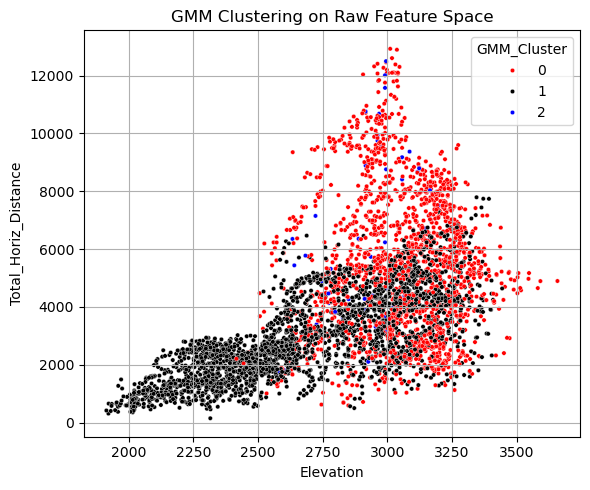

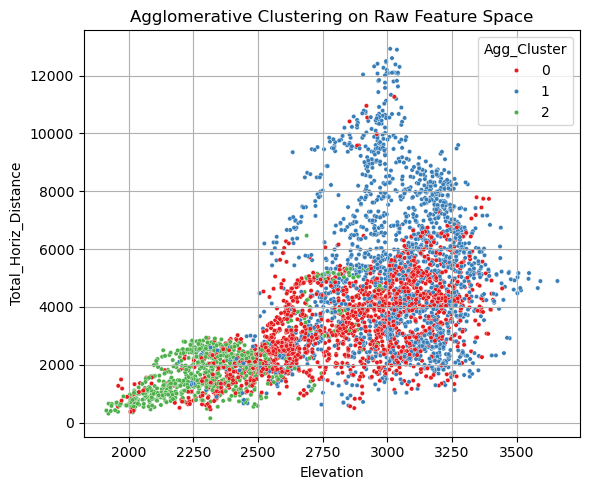

In [39]:
df_plot = df0_subset.copy()
df_plot['GMM_Cluster'] = gmm_labels 
df_plot['Agg_Cluster'] = agg_labels 

custom_palette = {0: "red", 1: "black", 2: "blue"}

# GMM visualization
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df_plot,
    x='Elevation',
    y='Total_Horiz_Distance',
    hue='GMM_Cluster',
    palette=custom_palette,
    s=10
)
plt.title("GMM Clustering on Raw Feature Space")
plt.grid(True)
plt.tight_layout()
plt.show()

# Agglomerative visualization
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df_plot,
    x='Elevation',
    y='Total_Horiz_Distance',
    hue='Agg_Cluster',
    palette='Set1',
    s=10
)
plt.title("Agglomerative Clustering on Raw Feature Space")
plt.grid(True)
plt.tight_layout()
plt.show()

### Clustering Evaluation and Interpretation (Before PCA)

We evaluated clustering quality using two standard external metrics:

- **Adjusted Rand Index (ARI)**: Measures the similarity between predicted clusters and true labels based on pairwise assignment, adjusted for chance. ARI is particularly helpful when assessing how well the model avoids misgrouping label pairs (e.g., class 1 vs class 2).

- **Normalized Mutual Information (NMI)**: Quantifies the shared information between predicted clusters and ground truth labels. It is invariant to label permutations and captures global structural similarity.

These metrics are widely used for external evaluation when ground truth labels are available. Together, they offer a balanced view:

- **ARI** reflects fine-grained label agreement.
- **NMI** captures the overall consistency in structure.

---

| Method        | ARI    | NMI    |
|---------------|--------|--------|
| GMM           | 0.2311 | 0.2594 |
| Agglomerative | 0.2007 | 0.2567 |

---
#### observation

GMM slightly outperformed Agglomerative in both ARI and NMI, suggesting better alignment with ground truth. However, visual inspection shows tradeoffs:

---
#### Cluster Visualization Quality Analysis
- `GMM Clustering`
    - Two clear clusters at low elevation, but the red cluster dominates mid-to-high regions.
    
    - Cluster 2 is nearly empty — indicates imbalance.
    
    - Suggests difficulty modeling binary features; likely overfitting continuous elevation patterns.
     
- `Agglomerative Clustering`

    - Better distribution across clusters.
    
    - Green cluster (likely class 3) is well-isolated.
    
    - Blue and red clusters overlap, especially in mid-elevation — consistent with class 1/2 overlap.
    
    - Handles binary and distance features better, producing more balanced partitions.
 
---
#### Verdict
Although GMM scores higher in metrics, Agglomerative yields more interpretable structure. The choice between them may depend on whether quantitative score or qualitative separation is prioritized.

## Section D - Principal Component Analysis (PCA)

In this section, we apply Principal Component Analysis (PCA) to reduce the dimensionality of the dataset while retaining at least 80% of the variance. The goal is to evaluate how dimensionality reduction affects classification and clustering performance, as well as to assess model sensitivity to feature compression.

### Section D.1 - PCA Fitting and Transformation

We first apply PCA to the scaled training data using `n_components=0.80`, which automatically selects the minimum number of components needed to retain ≥80% of the variance. The same transformation is applied to the validation and test sets to maintain consistency across evaluation phases.

In [40]:
pca = PCA(n_components=0.80, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"PCA reduced dimensions from {X_train_scaled.shape[1]} to {X_train_pca.shape[1]}")

PCA reduced dimensions from 51 to 32


### Section D.2 - Classification with PCA

We re-train the same classification models used in Section C—Random Forest, Gradient Boosting, and Neural Network—using the PCA-transformed training data. Hyperparameter tuning is performed again using the validation set. Performance is evaluated using macro-averaged F1 scores and confusion matrices.

This allows us to compare the accuracy and generalization capability of the models with and without dimensionality reduction.


### Section D.2.1 - Model: Random Forest using PCA

In [41]:
rf_gs_pca = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1
)
rf_gs_pca.fit(X_train_pca, y_train)

rf_best_pca = rf_gs_pca.best_estimator_
y_val_pred_rf_pca = rf_best_pca.predict(X_val_pca)
y_test_pred_rf_pca = rf_best_pca.predict(X_test_pca)

In [42]:
val_f1_rf_pca = f1_score(y_val, y_val_pred_rf_pca, average='macro')
test_f1_rf_pca = f1_score(y_test, y_test_pred_rf_pca, average='macro')
val_acc_rf_pca = accuracy_score(y_val, y_val_pred_rf_pca)
test_acc_rf_pca = accuracy_score(y_test, y_test_pred_rf_pca)

print("Random Forest using PCA Results:", "\n")
print("Best Params:", rf_gs_pca.best_params_)
print("Validation Macro F1 Score:", val_f1_rf_pca)
print("Test Macro F1 Score:", test_f1_rf_pca)
print("Validation Accuracy Score:", val_acc_rf_pca)
print("Test Accuracy Score:", test_acc_rf_pca)

Random Forest using PCA Results: 

Best Params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Validation Macro F1 Score: 0.8058050143958977
Test Macro F1 Score: 0.8388778256327925
Validation Accuracy Score: 0.8088888888888889
Test Accuracy Score: 0.84


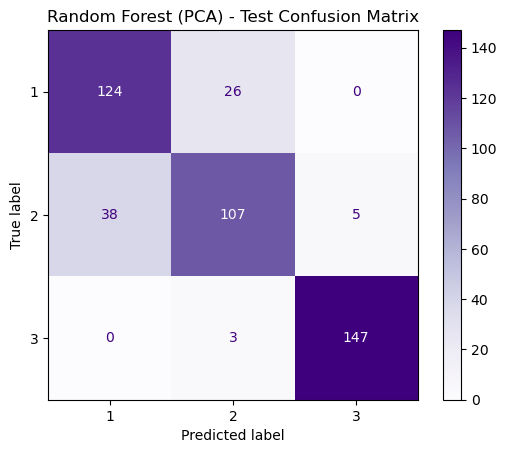

In [43]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_rf_pca, cmap='Purples')
plt.title("Random Forest (PCA) - Test Confusion Matrix")
plt.show()

##### random forest using PCA summary:
- Best Params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}

- Validation F1 = 0.806, Test F1 = 0.839

- Slight performance drop vs. non-PCA version (F1 from 0.859 → 0.839).

- Class 3 still excellent (147/150), class 1 and 2 confusion remains the weak point.

- PCA reduces binary separation slightly, affecting tree-based performance.

### Section D.2.2 - Model: GBoost using PCA

In [44]:
# Step 1: GridSearchCV on PCA-transformed data
gboost_gs_pca = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    gboost_params,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1
)
gboost_gs_pca.fit(X_train_pca, y_train)

# Step 2: Get best estimator and evaluate
gboost_best_pca = gboost_gs_pca.best_estimator_

y_val_pred_gb_pca = gboost_best_pca.predict(X_val_pca)
y_test_pred_gb_pca = gboost_best_pca.predict(X_test_pca)

val_f1_gb_pca = f1_score(y_val, y_val_pred_gb_pca, average='macro')
test_f1_gb_pca = f1_score(y_test, y_test_pred_gb_pca, average='macro')
val_acc_gb_pca = accuracy_score(y_val, y_val_pred_gb_pca)
test_acc_gb_pca = accuracy_score(y_test, y_test_pred_gb_pca)

print("Gradient Boost using PCA Results:", "\n")
print("Best Params:", gboost_gs_pca.best_params_)
print("Validation Macro F1 Score:", val_f1_gb_pca)
print("Test Macro F1 Score:", test_f1_gb_pca)
print("Validation Accuracy Score:", val_acc_gb_pca)
print("Test Accuracy Score:", test_acc_gb_pca)

Gradient Boost using PCA Results: 

Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Validation Macro F1 Score: 0.8180621731349
Test Macro F1 Score: 0.8240724011040763
Validation Accuracy Score: 0.82
Test Accuracy Score: 0.8244444444444444


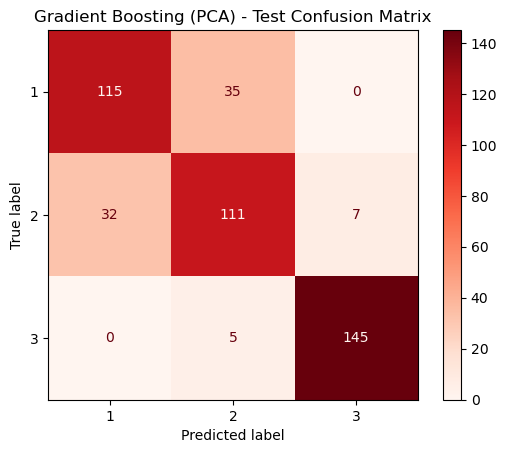

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_gb_pca, cmap="Reds")
plt.title("Gradient Boosting (PCA) - Test Confusion Matrix")
plt.show()

##### GBoost using PCA summary:
- Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

- Validation F1 = 0.818, Test F1 = 0.824

- Slightly weaker than raw-feature performance (F1 dropped from 0.836).

- Class 3 retains strong performance; class 1–2 confusion persists.

- PCA did not significantly benefit Gradient Boosting — tree structure may suffer from smoothed inputs.

### Section D.2.3 - Model: Neural Netwroks using PCA

In [46]:
# Step 1: GridSearchCV on PCA-transformed data
mlp_gs_pca = GridSearchCV(
    MLPClassifier(max_iter=500, early_stopping=True, random_state=42),
    mlp_params,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1
)
mlp_gs_pca.fit(X_train_pca, y_train)

# Step 2: Evaluate
mlp_best_pca = mlp_gs_pca.best_estimator_
y_val_pred_mlp_pca = mlp_best_pca.predict(X_val_pca)
y_test_pred_mlp_pca = mlp_best_pca.predict(X_test_pca)

val_f1_mlp_pca = f1_score(y_val, y_val_pred_mlp_pca, average='macro')
test_f1_mlp_pca = f1_score(y_test, y_test_pred_mlp_pca, average='macro')
val_acc_mlp_pca = accuracy_score(y_val, y_val_pred_mlp_pca)
test_acc_mlp_pca = accuracy_score(y_test, y_test_pred_mlp_pca)

print("Neural Networks using PCA Results:", "\n")
print("Best Params:", mlp_gs_pca.best_params_)
print("Validation Macro F1 Score:", val_f1_mlp_pca)
print("Test Macro F1 Score:", test_f1_mlp_pca)
print("Validation Accuracy Score:", val_acc_mlp_pca)
print("Test Accuracy Score:", test_acc_mlp_pca)

Neural Networks using PCA Results: 

Best Params: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant'}
Validation Macro F1 Score: 0.773661852760136
Test Macro F1 Score: 0.7997566887995543
Validation Accuracy Score: 0.78
Test Accuracy Score: 0.8044444444444444


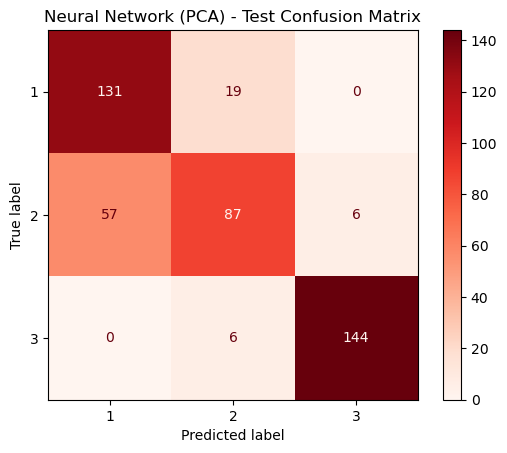

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_mlp_pca, cmap="Reds")
plt.title("Neural Network (PCA) - Test Confusion Matrix")
plt.show()

##### Neural Networks using Pca summary:
- Best Params: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant'}

- Validation F1 = 0.774, Test F1 = 0.800

- Slight drop in performance compared to raw data (F1 from 0.818 → 0.800)

- Class 3 well-classified (144/150); class 2 misclassified as 1 more frequently

- PCA may have slightly reduced model expressiveness due to information loss in binary one-hot features.

### Summary and Comparison

We compare macro F1 and accuracy of each model before and after PCA transformation:

| Model              | F1 (Original) | F1 (PCA) | Accuracy (Original) | Accuracy (PCA) |
|-------------------|---------------|----------|----------------------|----------------|
| Random Forest      | 0.859         | 0.839      | 86.0%                | 	84.0%            |
| Gradient Boosting  | 0.836         | 0.824      | 83.6%                | 82.4%            |
| Neural Network     | 0.818         | 0.800      | 82.0%                | 80.4%            |

--- 

#### observation:
slight accuracy/F1 loss is common due to reduced information, but PCA can improve training speed and reduce overfitting. Consistency of results across both representations shows model robustness.

### Section D.2.4 - VotingClassifier Ensemble after PCA

We trained a soft-voting ensemble on PCA-transformed data using Random Forest, Gradient Boosting, and Neural Network as base models.

In [48]:
voting_pca = VotingClassifier(estimators=[('rf', rf_best_pca), ('gb', gboost_best_pca), ('mlp', mlp_best_pca)], voting='soft')

voting_pca.fit(X_train_pca, y_train)

y_val_pred_vote_pca = voting_pca.predict(X_val_pca)
print("VotingClassifier (aftter PCA) - Validation F1:", f1_score(y_val, y_val_pred_vote_pca, average='macro'), "\n")
print(classification_report(y_val, y_val_pred_vote_pca))

# Test predictions
y_test_pred_vote_pca = voting_pca.predict(X_test_pca)
print("VotingClassifier (after PCA) - Test F1:", f1_score(y_test, y_test_pred_vote_pca, average='macro'), "\n")
print(classification_report(y_test, y_test_pred_vote_pca))

VotingClassifier (aftter PCA) - Validation F1: 0.8174231359075476 

              precision    recall  f1-score   support

           1       0.74      0.79      0.77       150
           2       0.77      0.67      0.72       150
           3       0.95      0.99      0.97       150

    accuracy                           0.82       450
   macro avg       0.82      0.82      0.82       450
weighted avg       0.82      0.82      0.82       450

VotingClassifier (after PCA) - Test F1: 0.832558297741809 

              precision    recall  f1-score   support

           1       0.76      0.83      0.79       150
           2       0.77      0.71      0.74       150
           3       0.97      0.97      0.97       150

    accuracy                           0.83       450
   macro avg       0.83      0.83      0.83       450
weighted avg       0.83      0.83      0.83       450



##### Voting ensemble (after PCA) summary:
 - The ensemble showed strong generalization even after dimensionality reduction with PCA, with only a small performance drop compared to the original feature space.

- Class 3 continued to be classified with very high accuracy, indicating it's well-separated even in lower dimensions.

- Class 2 was the most challenging, with slightly lower recall and F1, consistent with prior models.

- Overall, this PCA-based ensemble offers a good trade-off between performance and reduced dimensional complexity, especially if model runtime or overfitting is a concern.


### Section D.2.5 - Model Comparison and Evaluation after PCA

In [49]:
# Generate macro F1
metrics_summary_pca = {
    'Model': ['Random Forest', 'GBoost', 'Neural Networks'],
    'Val Accuracy': [
        accuracy_score(y_val, y_val_pred_rf_pca),
        accuracy_score(y_val, y_val_pred_gb_pca),
        accuracy_score(y_val, y_val_pred_mlp_pca)
    ],
    'Val Macro F1': [
        f1_score(y_val, y_val_pred_rf_pca, average='macro'),
        f1_score(y_val, y_val_pred_gb_pca, average='macro'),
        f1_score(y_val, y_val_pred_mlp_pca, average='macro')
    ],
    'Test Accuracy': [
        accuracy_score(y_test, y_test_pred_rf_pca),
        accuracy_score(y_test, y_test_pred_gb_pca),
        accuracy_score(y_test, y_test_pred_mlp_pca)
    ],
    'Test Macro F1': [
        f1_score(y_test, y_test_pred_rf_pca, average='macro'),
        f1_score(y_test, y_test_pred_gb_pca, average='macro'),
        f1_score(y_test, y_test_pred_mlp_pca, average='macro')
    ]
}
# Add VotingClassifier to the summary
metrics_summary_pca['Model'].append('Voting Ensemble')
metrics_summary_pca['Val Accuracy'].append(accuracy_score(y_val, y_val_pred_vote_pca))
metrics_summary_pca['Val Macro F1'].append(f1_score(y_val, y_val_pred_vote_pca, average='macro'))
metrics_summary_pca['Test Accuracy'].append(accuracy_score(y_test, y_test_pred_vote_pca))
metrics_summary_pca['Test Macro F1'].append(f1_score(y_test, y_test_pred_vote_pca, average='macro'))

summary_df_pca = pd.DataFrame(metrics_summary_pca)

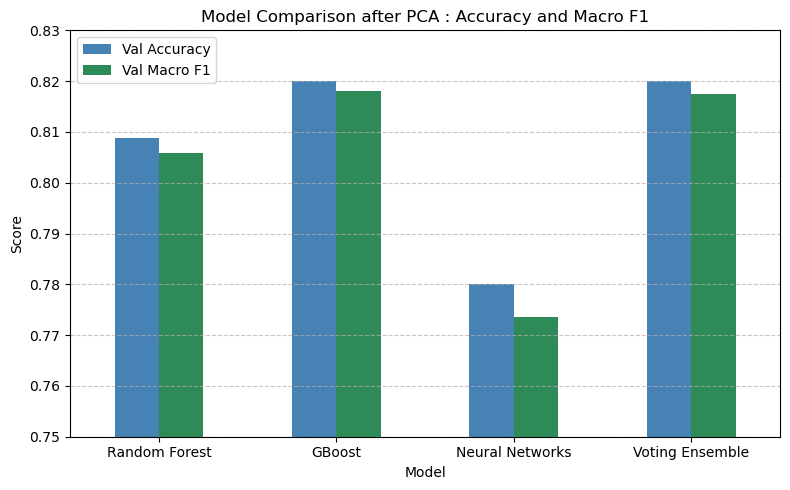

In [50]:
# Validation Plot
summary_df_pca.set_index('Model')[['Val Accuracy', 'Val Macro F1']].plot(kind='bar', figsize=(8, 5), color=['steelblue', 'seagreen'])
plt.title('Model Comparison after PCA : Accuracy and Macro F1')
plt.ylabel('Score')
plt.ylim(0.75, 0.83)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

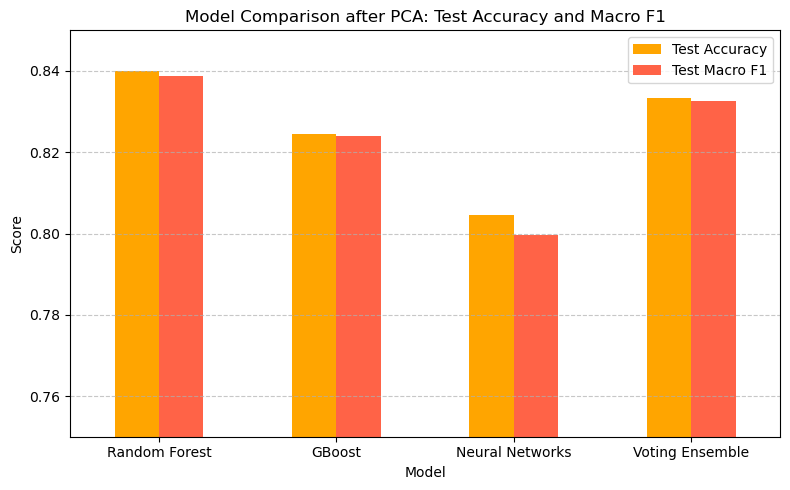

In [51]:
# Test Plot
summary_df_pca.set_index('Model')[['Test Accuracy', 'Test Macro F1']].plot(kind='bar', figsize=(8, 5), color=['orange', 'tomato'])
plt.title('Model Comparison after PCA: Test Accuracy and Macro F1')
plt.ylabel('Score')
plt.ylim(0.75, 0.85)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Final Evaluation Summary after PCA


| Model              | Validation Accuracy | Val Macro F1 | Test Accuracy | Test Macro F1  |
|-------------------|---------------|----------|----------------------|----------------|
| Random Forest      | 	80.9%         | 0.806      | 84.0%                | 	0.839           |
| Gradient Boosting  | 82.0%         | 0.818      | 82.4%                | 0.824           |
| Neural Network     | 78.0%         | 0.774      | 80.4%               | 0.800            |
| Voting Ensemble     | 82.0%        | 0.817      | 83.3%                | 0.833            |

---

#### Key Insights:
- Random Forest maintained strong test performance and achieved the highest test macro F1, confirming its robustness even after dimensionality reduction.

- Gradient Boosting showed consistent generalization with balanced performance on both val/test sets, although it slightly underperformed RF in final scores.

- Neural Network had the lowest scores post-PCA, suggesting that dimensionality reduction may have affected its ability to model complex patterns.

- Voting Ensemble emerged as the most stable and balanced model, offering a great trade-off between accuracy and F1. It performed better than each individual model on average, especially in class 2, which was harder to classify correctly in standalone models.

### Section D.3 - clustering on PCA-Reduced Data

In [52]:
X_pca = pca.fit_transform(X_scaled_clustering)

print(f"PCA - Number of components to retain ≥80% variance: {pca.n_components_}")

PCA - Number of components to retain ≥80% variance: 32


### Section D.3.1 - Model: GMM and Agglomerative Clustering

To evaluate unsupervised learning performance in lower-dimensional space, we apply the same clustering algorithms (Gaussian Mixture Model and Agglomerative Clustering) to the PCA-reduced dataset. Evaluation metrics used are Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI), allowing for direct comparison with clustering results from the original feature space.

In [53]:
gmm_pca = GaussianMixture(n_components=3, random_state=42)
gmm_labels_pca = gmm_pca.fit_predict(X_pca)

agg_pca = AgglomerativeClustering(n_clusters=3)
agg_labels_pca = agg_pca.fit_predict(X_pca)

gmm_ari_pca, gmm_nmi_pca = evaluate_clustering(true_labels, gmm_labels_pca, "GMM (PCA)")
agg_ari_pca, agg_nmi_pca = evaluate_clustering(true_labels, agg_labels_pca, "Agglomerative (PCA)")

GMM (PCA) ARI: 0.5023
GMM (PCA) NMI: 0.5674

Agglomerative (PCA) ARI: 0.2275
Agglomerative (PCA) NMI: 0.2886



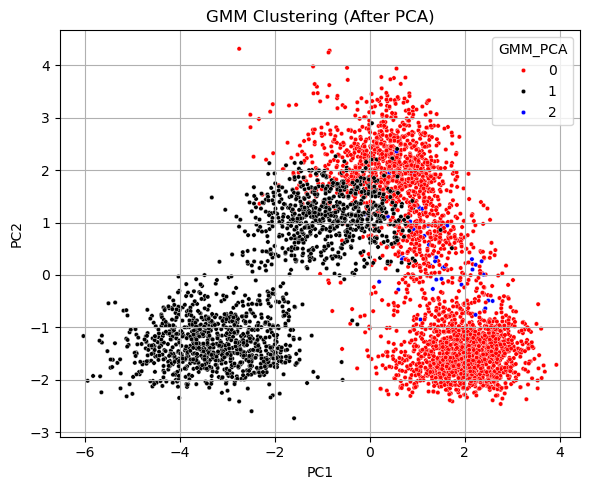

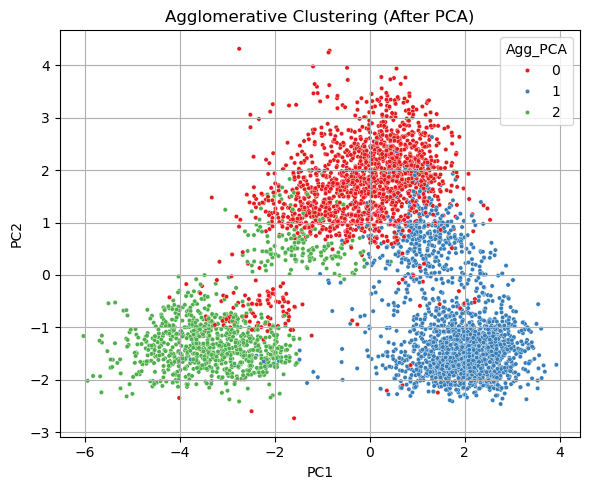

In [54]:
df_pca_vis = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])
df_pca_vis['GMM_PCA'] = gmm_labels_pca
df_pca_vis['Agg_PCA'] = agg_labels_pca

custom_palette = {0: "red", 1: "black", 2: "blue"}

# Plot GMM
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_pca_vis, x='PC1', y='PC2', hue='GMM_PCA', palette=custom_palette, s=10)
plt.title("GMM Clustering (After PCA)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Agglomerative
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_pca_vis, x='PC1', y='PC2', hue='Agg_PCA', palette='Set1', s=10)
plt.title("Agglomerative Clustering (After PCA)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Clustering Results (after PCA)

| Method           | ARI     | NMI     |
|------------------|---------|---------|
| GMM              | 0.5023 | 0.5674  |
| Agglomerative    | 0.2275  | 0.2886  |

---

### Clustering after PCA summary:
- GMM after PCA showed major improvement — compact, well-separated clusters in PC1/PC2.

- Agglomerative slightly improved vs. before PCA, but still underperforms GMM.

- PCA helps GMM a lot by removing noise and emphasizing continuous structure.

- ARI improvement from 0.23 → 0.50 confirms that GMM aligns better with labels in PCA space.

---
#### Cluster Visualization Quality Analysis
- `GMM`
    - Clusters are reasonably distinct, especially black and red. Blue is visibly embedded within the red region.
    
    - The overlap suggests residual class 1/2 entanglement, as seen in earlier results.
    
    - GMM benefited from PCA’s reduction of noise, but still inherits some of the original data’s overlapping structure.
     
- `Agglomerative`
    - Three clusters are identifiable. Green is compact; red overlaps with blue in the center.
    
    - Distance-based linkage is sensitive to PCA’s transformation, which may distort local structures.
    
    - Still better than pre-PCA, but not ideal for separating intertwined classes.
 
---
#### Verdict

GMM is clearly superior post-PCA, both in quantitative metrics and visual clarity.

However, no method achieves full separation, reinforcing that the dataset contains nontrivial class overlap — especially between classes 1 and 2.

### Section D.4 - All Classification Models configuration comparison

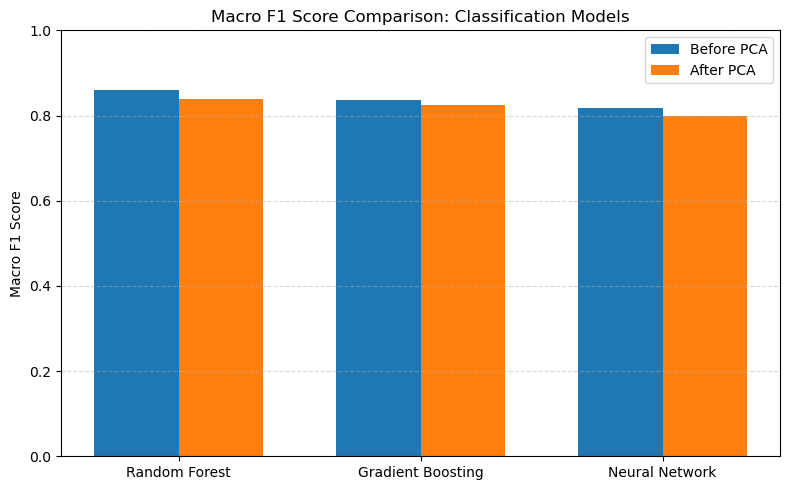

In [55]:
classification_f1_before = {
    "Random Forest": test_f1_rf,
    "Gradient Boosting": test_f1_gb,
    "Neural Network": test_f1_mlp
}

classification_f1_after = {
    "Random Forest": test_f1_rf_pca,
    "Gradient Boosting": test_f1_gb_pca,
    "Neural Network": test_f1_mlp_pca
}

clustering_ari_before = {
    "GMM": gmm_ari,
    "Agglomerative": agg_ari
}

clustering_ari_after = {
    "GMM": gmm_ari_pca,
    "Agglomerative": agg_ari_pca
}

clustering_nmi_before = {
    "GMM": gmm_nmi,
    "Agglomerative": agg_nmi
}

clustering_nmi_after = {
    "GMM": gmm_nmi_pca,
    "Agglomerative": agg_nmi_pca 
}

def plot_classification_comparison(before_scores, after_scores, metric_name="Macro F1 Score"):
    models = list(before_scores.keys())
    before = [before_scores[m] for m in models]
    after = [after_scores[m] for m in models]
    x = range(len(models))
    width = 0.35

    plt.figure(figsize=(8, 5))
    plt.bar([i - width/2 for i in x], before, width, label='Before PCA')
    plt.bar([i + width/2 for i in x], after, width, label='After PCA')
    plt.xticks(x, models)
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} Comparison: Classification Models")
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


def plot_clustering_comparison(before_scores_ari, after_scores_ari, before_scores_nmi, after_scores_nmi):
    models = list(before_scores_ari.keys())
    x = range(len(models))
    width = 0.35

    # ARI
    before = [before_scores_ari[m] for m in models]
    after = [after_scores_ari[m] for m in models]
    plt.figure(figsize=(8, 5))
    plt.bar([i - width/2 for i in x], before, width, label='Before PCA')
    plt.bar([i + width/2 for i in x], after, width, label='After PCA')
    plt.xticks(x, models)
    plt.ylabel("ARI")
    plt.title("ARI Comparison: Clustering Models")
    plt.ylim(0, 0.6)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # NMI
    before = [before_scores_nmi[m] for m in models]
    after = [after_scores_nmi[m] for m in models]
    plt.figure(figsize=(8, 5))
    plt.bar([i - width/2 for i in x], before, width, label='Before PCA')
    plt.bar([i + width/2 for i in x], after, width, label='After PCA')
    plt.xticks(x, models)
    plt.ylabel("NMI")
    plt.title("NMI Comparison: Clustering Models")
    plt.ylim(0, 0.6)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

plot_classification_comparison(classification_f1_before, classification_f1_after)

#### Observation:
All three classification models (Random Forest, Gradient Boosting, and Neural Network) experienced a slight performance drop in macro-averaged F1 score after applying PCA.

- Random Forest dropped from ~0.86 to ~0.84

- Gradient Boosting dropped from ~0.83 to ~0.82

- Neural Network dropped from ~0.82 to ~0.80

This is expected because PCA transforms the feature space into uncorrelated principal components, which may weaken signal strength from discrete or binary features (like soil/wilderness types). Tree-based models in particular rely on raw feature thresholds and are often less suited for PCA-transformed data.,

### Section D.5 - All Clustering Models configuration comparison

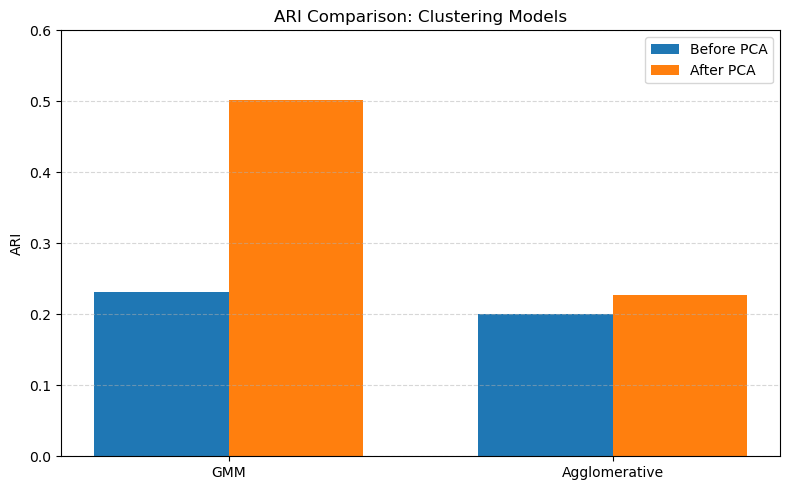

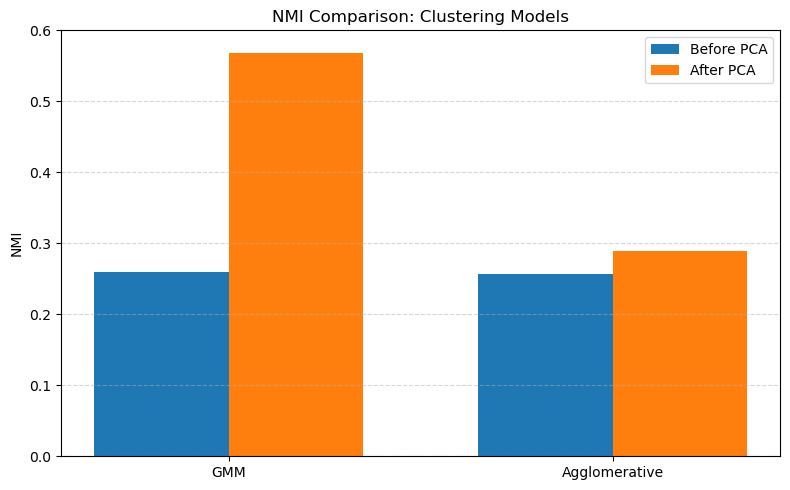

In [56]:
plot_clustering_comparison(clustering_ari_before, clustering_ari_after, clustering_nmi_before, clustering_nmi_after)

#### ARI Observation:
GMM clustering showed a major improvement in ARI after PCA — rising from 0.23 to ~0.50 — indicating much better alignment with ground-truth labels in the reduced space.
Agglomerative clustering saw only a minor increase (0.20 to ~0.23), suggesting PCA helped slightly but did not significantly enhance its clustering performance.

This confirms that GMM benefits from the continuous, Gaussian-friendly structure created by PCA, while Agglomerative is more limited by its distance-based hierarchical approach.
Among the 4 ARI configurations, GMM after PCA clearly achieved the highest alignment with true labels.

#### NMI Observation:
Normalized Mutual Information (NMI) increased substantially for GMM after PCA (from 0.26 to ~0.57), reinforcing that GMM captures more structure and cluster-label alignment in reduced dimensions.
Agglomerative clustering improved only slightly (0.26 to ~0.29), consistent with the ARI trend.

The results suggest PCA enhances the semantic interpretability and structure of GMM clusters, but Agglomerative clustering sees minimal benefit, likely due to PCA compressing binary signal strengths.
Across all 4 NMI configurations, GMM after PCA again demonstrated the best clustering performance.

#### overall clustering observation:
When comparing all eight clustering configurations (GMM and Agglomerative, each with ARI/NMI before and after PCA), GMM after PCA consistently outperformed all other setups. It showed the largest gains in both ARI and NMI, making it the most effective clustering approach for this dataset after dimensionality reduction.